# Проект: Яндекс.Музыка

**Цель исследования**:

Сравнить музыкальные предпочтения пользователей Москвы и Петербурга

**Задачи** — проверьте три гипотезы:
1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

**Этапы выполнения**
 1. Знакомство с данными. 
 2. Предобработка данных.
 3. Проверка гипотез. 

**Описание данных:**

**Датасет yandex_music_project.csv**

Описание колонок:
- userID — идентификатор пользователя;
- Track — название трека;
- artist — имя исполнителя;
- genre — название жанра;
- City — город пользователя;
- time — время начала прослушивания;
- Day — день недели.

<hr style="border: 2px solid green;" />

### Итоги исследования

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**В данной работе не проводилась проверка статистических гипотез.**

<hr style="border: 2px solid green;" />

## Этап 1: Знакомство с данными

In [1]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

In [112]:
df = pd.read_csv(r'C:\Users\mirra\Desktop\Yandex.praktikum\Проекты\DA_Проекты\DA_Final_versions\Музыка_больших_городов_1\yandex_music_project.csv') 

In [113]:
# Cбросим ограничения на количество выводимых столбцов

pd.set_option('display.max_columns', None)

# Настроим вывод всего текста

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [114]:
# Выведем необходимые данные с общей информацией по всем датасетам

tables = [df]
names = ['df']

for name, table in zip(names, tables):
    print(
        f'\n\033[1;30;46m_____________ДАТАСЕТ:  {name.upper()}_____________\033[0;0m\n',
        '\n\033[2;30;47m Вывод первых строк: \033[0;0m',
        )
    display(table.head(3))
    print('\n\033[2;30;47m Общая информация: \033[0;0m')
    display(table.info(memory_usage='deep'))
    print('\033[2;30;47m Подсчет доли пропусков в %: \033[0;0m')
    display(round(table.isnull().mean() * 100, 2))
    print(
        '\033[2;30;47m Подсчет дубликатов\033[0;0m', 
        '  ', round(table.duplicated().mean() * 100, 4),  ' %'
        )
    print('\n\033[2;30;47m Общая сводка строковых значений: \033[0;0m')
    try:
        display(table.describe(include=['object']).T)
    except:
        print('Датасет не содержит строковых значений')
    print('\n\033[2;30;47m Сводка числовых значений, включая даты: \033[0;0m')
    try:
        display(table.describe(datetime_is_numeric=True).T)
    except:
        print('Датасет не содержит числовых значений')
    print ('\n\033[01;30;46m_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________\033[0;0m\n\n')


_____________ДАТАСЕТ:  DF_____________
 
 Вывод первых строк: 


,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday



 Общая информация: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 29.1 MB


None

 Подсчет доли пропусков в %: 


  userID    0.00
Track       1.89
artist     11.07
genre       1.84
  City      0.00
time        0.00
Day         0.00
dtype: float64

 Подсчет дубликатов    5.879  %

 Общая сводка строковых значений: 


,count,unique,top,freq
userID,65079,41748,A8AE9169,76
Track,63848,47245,Intro,34
artist,57876,43605,Koala,6
genre,63881,289,pop,8850
City,65079,2,Moscow,45360
time,65079,20392,21:51:22,14
Day,65079,3,Friday,23149



 Сводка числовых значений, включая даты: 


,count,unique,top,freq
userID,65079,41748,A8AE9169,76
Track,63848,47245,Intro,34
artist,57876,43605,Koala,6
genre,63881,289,pop,8850
City,65079,2,Moscow,45360
time,65079,20392,21:51:22,14
Day,65079,3,Friday,23149



_____________ОКОНЧАНИЕ ОТЧЕТА ПО ДАТАСЕТУ_____________




In [115]:
print("Количество пропусков: {}".format(df.duplicated().sum()))

Количество пропусков: 3826


### Выводы:

1. Датасет содержит 65079 записей о прослушанных треках с Яндекс Музыки;
2. Семь (7) колонок датасета содержат данные о названии трека, имени артиста, жанре, городе, времени начала прослушивания, дне недели и ID пользователя;
3. Пропуски в данных присутствуют:
   - artist (11.07%), в этой колонке содержится информация о имени артиста;
   - Track (1.89%), в этой колонке содержится информация о названии трека;
   - genre (1.84%), в этой колонке содержится информация о жанре;      
4. Дубликаты в данных - 3826 (5.87%);
5. Ошибок в строковых значениях нет. Датасет содержит:
   - 41748 уникальных ID пользователей;
   - 47245 трека;
   - 43605 артиста;
   - 289 - жанра.
6. Датасет не содержит числовых значений, все колонки, в т.ч. время прослушивания, имеет тип object. 


Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Внесение корректировок в датасеты (план для раздела Предобработки)

**_Что нужно скорректировать:_**

1. Названия колонок 
     - привести все к одному стандарту (сейчас верблюжий регистр)


2. Проработать пропуски
    - Не все пропущенные значения влияют на исследование. В `track` и `artist` пропуски не важны для целей исследования, заменим их явными обозначениями.
    - Пропуски в genre могут помешать сравнению музыкальных вкусов в Москве и Санкт-Петербурге. Было бы правильно установить причину и восстановить данные, но такой возможности нет в учебном проекте. Поэтому заполню пропуски явными обозначениями и оценю, насколько они повлияют на расчёты.
    
    
3. Проработать дубликаты
    - Удалить явные дубликаты
    - Проверить наличие неявных дубликатов и скорректировать

## Этап 2: Предобработка данных

**Задачи:**
1. Исправить стиль в заголовках столбцов
2. Проработака пропусков
2. Проработака явных и неявных дубликатов

#### Задача 1: Исправить стиль в заголовках столбцов

Приведём названия в соответствие с общепринятым стилем:
- несколько слов в названии запишем в «змеином_регистре»,
- все символы сделаем строчными,
- устраним пробелы.

* `'  userID'` → `'user_id'`;
* `'Track'` → `'track'`;
* `'  City  '` → `'city'`;
* `'Day'` → `'day'`.

In [116]:
# Перечень названий столбцов таблицы df

display(df.columns)

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

In [117]:
# Преобразование к общепринятому стилю

df.columns = df.columns.str.lower().str.strip()
df = df.rename(columns={'userid' : 'user_id'}) 

display(df.columns)

Index(['user_id', 'track', 'artist', 'genre', 'city', 'time', 'day'], dtype='object')

#### Задача 2: Проработака пропусков

Пропуски в данных присутствуют:
  - artist (11.07%), в этой колонке содержится информация о имени артиста;
  - Track (1.89%), в этой колонке содержится информация о названии трека;
  - genre (1.84%), в этой колонке содержится информация о жанре; 

In [118]:
# Подсчёт количества пропусков

df.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

In [119]:
# Заменим пропущенные значения в столбцах track, artist и genre на строку 'unknown'

columns_to_replace = ['track', 'artist', 'genre']

for col in columns_to_replace:
    df[col] = df[col].fillna('unknown') 

In [120]:
# Проверка отсутсвия пропусков

df.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

#### Задача 3: Исключить дубликаты

Явных дубликатов в данных - 3826 (5.87%)

In [121]:
print("Количество пропусков: {}".format(df.duplicated().sum()))

Количество пропусков: 3826


In [122]:
# Удаление явных дубликатов (с удалением старых индексов и формированием новых)

df = df.drop_duplicates().reset_index(drop=True)

In [123]:
# Проверка на отсутствие явных дубликатов
    
df.duplicated().sum()

0

In [136]:
# Просмотр уникальных названий жанров для проверки неявных дубликатов
    
sorted(df['genre'].unique())
#df['genre'].value_counts()

['acid',
 'acoustic',
 'action',
 'adult',
 'africa',
 'afrikaans',
 'alternative',
 'alternativepunk',
 'ambient',
 'americana',
 'animated',
 'anime',
 'arabesk',
 'arabic',
 'arena',
 'argentinetango',
 'art',
 'audiobook',
 'author',
 'avantgarde',
 'axé',
 'baile',
 'balkan',
 'beats',
 'bigroom',
 'black',
 'bluegrass',
 'blues',
 'bollywood',
 'bossa',
 'brazilian',
 'breakbeat',
 'breaks',
 'broadway',
 'cantautori',
 'cantopop',
 'canzone',
 'caribbean',
 'caucasian',
 'celtic',
 'chamber',
 'chanson',
 'children',
 'chill',
 'chinese',
 'choral',
 'christian',
 'christmas',
 'classical',
 'classicmetal',
 'club',
 'colombian',
 'comedy',
 'conjazz',
 'contemporary',
 'country',
 'cuban',
 'dance',
 'dancehall',
 'dancepop',
 'dark',
 'death',
 'deep',
 'deutschrock',
 'deutschspr',
 'dirty',
 'disco',
 'dnb',
 'documentary',
 'downbeat',
 'downtempo',
 'drum',
 'dub',
 'dubstep',
 'eastern',
 'easy',
 'electronic',
 'electropop',
 'emo',
 'entehno',
 'epicmetal',
 'estrada',


**Комментарии:**

- Есть неявные дубликаты жанра hiphop:
   -  *hip*,
   -  *hop*,
   - *hip-hop*.

Чтобы очистить от них таблицу, напишем функцию `replace_wrong_genres()` с двумя параметрами: 
* `wrong_genres` — список дубликатов,
* `correct_genre` — строка с правильным значением.

Функция должна исправить колонку `genre` в таблице `df`: заменить каждое значение из списка `wrong_genres` на значение из `correct_genre`.

In [127]:
# Количество уникальных элементов в столбце genre
len(df['genre'].unique())

290

In [132]:
# Функция для преобразования названий жанров (замены неявных дубликатов)

def replace_wrong_genres(wrong_genres, correct_genre):
    for genre_name in wrong_genres:
        df['genre'] = df['genre'].replace(wrong_genres, correct_genre)
     
    
# Устранение неявных дубликатов
duplicates = ['hip', 'hop', 'hip-hop']
name = 'hiphop'
replace_wrong_genres(duplicates, name)       

# Проверям количество уникальных элементов в столбце genre после применения функции
len(df['genre'].unique())

287

### Выводы:

В процессе предобработки исправлены ранее выявленные проблемы в данных:

1. Названия колонок приведены к единому стилю
2. Пропуски в колонках track, artist и genre заполнены заглушкой 'unknown'
2. Явные дубликаты удалены, а неявные скорректированы:
- после замены разных написаний одного жанра hiphop, количество уникальных названий жанров в колонке genre уменьшилось с 290 до 287

## Этап 3: Проверка гипотез


**Задачи** — проверьте три гипотезы:

1. Активность пользователей зависит от дня недели. Причём в Москве и Петербурге это проявляется по-разному.
2. В понедельник утром в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города. 
3. Москва и Петербург предпочитают разные жанры музыки. В Москве чаще слушают поп-музыку, в Петербурге — русский рэп.

### Задача 1: Сравнение поведения пользователей двух столиц

Первая гипотеза утверждает, что пользователи по-разному слушают музыку в Москве и Санкт-Петербурге. Проверьте это предположение по данным о трёх днях недели — понедельнике, среде и пятнице. Для этого:

* Разделите пользователей Москвы и Санкт-Петербурга
* Сравните, сколько треков послушала каждая группа пользователей в понедельник, среду и пятницу.

In [154]:
print('Всего прослушиваний:', df.shape[0])

Всего прослушиваний: 61253


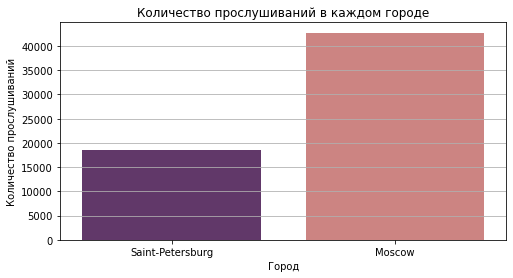

,city,listening_count,share
0,Saint-Petersburg,18512,30.22
1,Moscow,42741,69.78


In [177]:
# Подсчёт прослушиваний в каждом городе

user_activity = (
    df.groupby('city')['user_id'].count()
    .to_frame()
    .rename(columns={'user_id':'listening_count'})
    .sort_values(by='listening_count')
    .reset_index()
)

user_activity['share'] = user_activity['listening_count'] / user_activity['listening_count'].sum() * 100

plt.figure(figsize=(8, 4))
plt.grid(True)
sns.barplot(y='listening_count', x='city', data=user_activity, color="darkturquoise",  palette="magma", saturation=.5)
#plt.xticks(rotation=70)
plt.title('Количество прослушиваний в каждом городе')
plt.xlabel('Город')
plt.ylabel('Количество прослушиваний')
plt.show()

user_activity

**Комментарии к графику:**

- Доля прослушиваний:
    - В Москве: 69.78%
    - В Санкт-Петербурге: 30.22%
- В Москве прослушиваний больше, чем в Петербурге. Из этого не следует, что московские пользователи чаще слушают музыку. Просто самих пользователей в Москве больше.

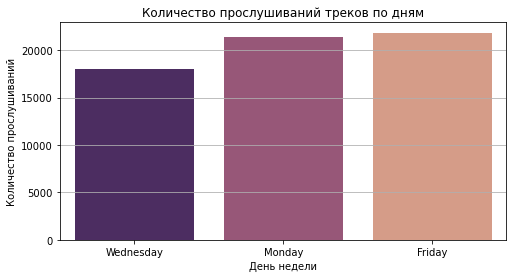

,day,listening_count,share
0,Wednesday,18059,29.48
1,Monday,21354,34.86
2,Friday,21840,35.66


In [176]:
# Подсчёт прослушиваний в каждый из трёх дней

weekday = (
    df.groupby('day')['user_id'].count()
    .to_frame()
    .rename(columns={'user_id':'listening_count'})
    .sort_values(by='listening_count')
    .reset_index()
)

weekday['share'] = weekday['listening_count'] / weekday['listening_count'].sum() * 100

plt.figure(figsize=(8, 4))
plt.grid(True)
sns.barplot(y='listening_count', x='day', data=weekday, color="darkturquoise",  palette="magma", saturation=.5)
#plt.xticks(rotation=70)
plt.title('Количество прослушиваний треков по дням')
plt.xlabel('День недели')
plt.ylabel('Количество прослушиваний')
plt.show()

weekday

**Комментарии к графику:**

- Доля прослушиваний:
    - По понедельникам: 29.48%
    - По средам: 34.86%
    - По пятницам: 35.66%
- В среднем пользователи из двух городов менее активны по средам. Но картина может измениться, если рассмотреть каждый город в отдельности.

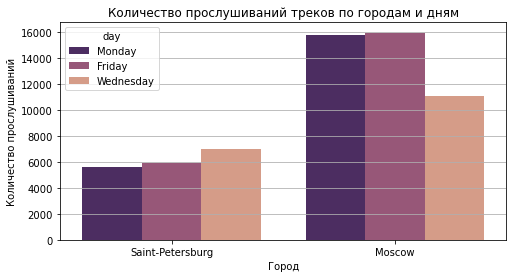

,city,day,listening_count
0,Saint-Petersburg,Monday,5614
1,Saint-Petersburg,Friday,5895
2,Saint-Petersburg,Wednesday,7003
3,Moscow,Wednesday,11056
4,Moscow,Monday,15740
5,Moscow,Friday,15945


In [175]:
city_day = (
    df.groupby(['city', 'day'])['user_id'].count()
    .to_frame()
    .rename(columns={'user_id':'listening_count'})
    .sort_values(by='listening_count')
    .reset_index()
)

plt.figure(figsize=(8, 4))
plt.grid(True)
sns.barplot(y='listening_count', x='city', data=city_day, hue='day', color="darkturquoise",  palette="magma", saturation=.5)
#plt.xticks(rotation=70)
plt.title('Количество прослушиваний треков по городам и дням')
plt.xlabel('Город')
plt.ylabel('Количество прослушиваний')
plt.show()

city_day

In [178]:
def number_tracks(day, city):
    track_list = df[df['day'] == day]
    track_list = track_list[track_list['city'] == city]
    track_list_count = track_list['user_id'].count()
    return track_list_count                  
                                  
# print(number_tracks('Monday', 'Moscow'))
# print(number_tracks('Monday', 'Saint-Petersburg'))
# print(number_tracks('Wednesday', 'Moscow'))
# print(number_tracks('Wednesday', 'Saint-Petersburg'))
# print(number_tracks('Friday', 'Moscow'))
# print(number_tracks('Friday', 'Saint-Petersburg'))

data = [
    ['Moscow', 15740, 11056, 15945],
    ['Saint-Petersburg', 5614, 7003, 5895]
]
columns = ['city', 'monday', 'wednesday', 'friday']
city_day = pd.DataFrame(data=data, columns=columns)
display(city_day)

### Выводы по первой задаче:

Данные показывают разницу поведения пользователей:
- В Москве пик прослушиваний приходится на понедельник и пятницу, а в среду заметен спад.
- В Петербурге, наоборот, больше слушают музыку по средам. Активность в понедельник и пятницу здесь почти в равной мере уступает среде.

Значит, данные говорят в пользу первой гипотезы.

### Задача 2: Музыка в начале и в конце недели

Согласно второй гипотезе, утром в понедельник в Москве преобладают одни жанры, а в Петербурге — другие. Так же и вечером пятницы преобладают разные жанры — в зависимости от города.

Сохраните таблицы с данными в две переменные:
* по Москве — в `moscow_general`;
* по Санкт-Петербургу — в `spb_general`.

In [186]:
moscow_general = df[df['city'] == 'Moscow']
spb_general = df[df['city'] == 'Saint-Petersburg']
#spb_general.head()

In [195]:
# Объявление функции genre_weekday() с параметрами table, day, time1, time2,
# которая возвращает информацию о самых популярных жанрах в указанный день в заданное время

def genre_weekday(table, day, time1, time2):
    genre_df = table[(table['day'] == day) & (table['time'] > time1) & (table['time'] < time2)]
    genre_df_count = genre_df.groupby('genre')['genre'].count()
    genre_df_sorted = genre_df_count.sort_values(ascending=False)
    genre_df_sorted.head(10)
    return genre_df_sorted

print('Москва, понедельник с 7:00 до 11:00, Топ-10 популярных жанров:', genre_weekday(moscow_general, 'Monday', '07:00', '11:00').head(10))
print()
print('Москва, пятница с 17:00 до 23:00, Топ-10 популярных жанров:', genre_weekday(moscow_general, 'Friday', '17:00', '23:00').head(10))
print()
print('Санкт-Петербург, понедельник с 7:00 до 11:00, Топ-10 популярных жанров:', genre_weekday(spb_general, 'Monday', '07:00', '11:00').head(10))
print()
print('Санкт-Петербург, пятница с 17:00 до 23:00, Топ-10 популярных жанров:', genre_weekday(spb_general, 'Friday', '17:00', '23:00').head(10))

Москва, понедельник с 7:00 до 11:00, Топ-10 популярных жанров: genre
pop            781
dance          549
electronic     480
rock           474
hiphop         286
ruspop         186
world          181
rusrap         175
alternative    164
unknown        161
Name: genre, dtype: int64

Москва, пятница с 17:00 до 23:00, Топ-10 популярных жанров: genre
pop            713
rock           517
dance          495
electronic     482
hiphop         273
world          208
ruspop         170
alternative    163
classical      163
rusrap         142
Name: genre, dtype: int64

Санкт-Петербург, понедельник с 7:00 до 11:00, Топ-10 популярных жанров: genre
pop            218
dance          182
rock           162
electronic     147
hiphop          80
ruspop          64
alternative     58
rusrap          55
jazz            44
classical       40
Name: genre, dtype: int64

Санкт-Петербург, пятница с 17:00 до 23:00, Топ-10 популярных жанров: genre
pop            256
electronic     216
rock           216
danc

### Выводы по второй задаче:

Если сравнить топ-10 жанров в понедельник утром, можно сделать такие выводы:

1. В Москве и Петербурге слушают похожую музыку. Единственное отличие — в московский рейтинг вошёл жанр “world”, а в петербургский — джаз и классика.

2. В Москве пропущенных значений оказалось так много, что значение `'unknown'` заняло десятое место среди самых популярных жанров. Значит, пропущенные значения занимают существенную долю в данных и угрожают достоверности исследования.

Вечер пятницы не меняет эту картину. Некоторые жанры поднимаются немного выше, другие спускаются, но в целом топ-10 остаётся тем же самым.

Таким образом, вторая гипотеза подтвердилась лишь частично:
* Пользователи слушают похожую музыку в начале недели и в конце.
* Разница между Москвой и Петербургом не слишком выражена. В Москве чаще слушают русскую популярную музыку, в Петербурге — джаз.

Однако пропуски в данных ставят под сомнение этот результат. В Москве их так много, что рейтинг топ-10 мог бы выглядеть иначе, если бы не утерянные  данные о жанрах.

### Задача 3: Жанровые предпочтения в Москве и Петербурге

Гипотеза: Петербург — столица рэпа, музыку этого жанра там слушают чаще, чем в Москве. А Москва — город контрастов, в котором, тем не менее, преобладает поп-музыка.

Сгруппируйте таблицу `moscow_general` по жанру и посчитайте прослушивания треков каждого жанра методом `count()`. Затем отсортируйте результат в порядке убывания и сохраните его в таблице `moscow_genres`.

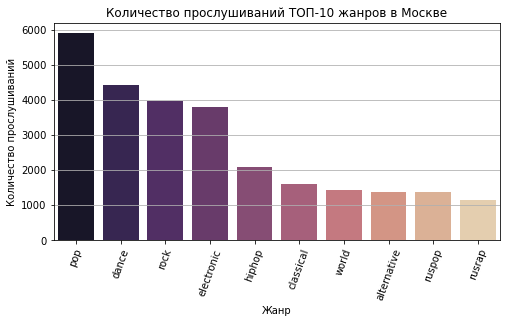

,genre,listening_count
0,pop,5892
1,dance,4435
2,rock,3965
3,electronic,3786
4,hiphop,2096
5,classical,1616
6,world,1432
7,alternative,1379
8,ruspop,1372
9,rusrap,1161


In [206]:
moscow_genres = (
    moscow_general.groupby('genre')['genre'].count()
    .sort_values(ascending=False).head(10)
    .to_frame()
    .rename(columns={'genre':'listening_count'})
    .reset_index()
)

plt.figure(figsize=(8, 4))
plt.grid(True)
sns.barplot(y='listening_count', x='genre', data=moscow_genres, color="darkturquoise",  palette="magma", saturation=.5)
plt.xticks(rotation=70)
plt.title('Количество прослушиваний ТОП-10 жанров в Москве')
plt.xlabel('Жанр')
plt.ylabel('Количество прослушиваний')
plt.show()

moscow_genres

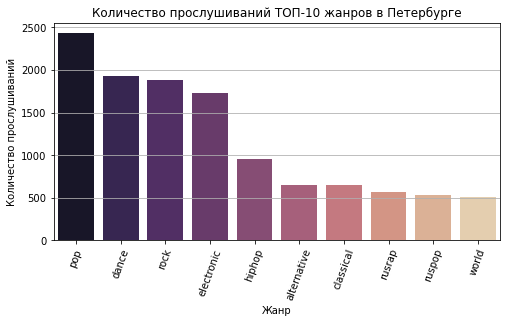

,genre,listening_count
0,pop,2431
1,dance,1932
2,rock,1879
3,electronic,1736
4,hiphop,960
5,alternative,649
6,classical,646
7,rusrap,564
8,ruspop,538
9,world,515


In [207]:
spb_genres = (
    spb_general.groupby('genre')['genre'].count()
    .sort_values(ascending=False).head(10)
    .to_frame()
    .rename(columns={'genre':'listening_count'})
    .reset_index()
)

plt.figure(figsize=(8, 4))
plt.grid(True)
sns.barplot(y='listening_count', x='genre', data=spb_genres, color="darkturquoise",  palette="magma", saturation=.5)
plt.xticks(rotation=70)
plt.title('Количество прослушиваний ТОП-10 жанров в Петербурге')
plt.xlabel('Жанр')
plt.ylabel('Количество прослушиваний')
plt.show()

spb_genres

### Выводы по третьей задаче:

Гипотеза частично подтвердилась:
* Поп-музыка — самый популярный жанр в Москве, как и предполагала гипотеза. Более того, в топ-10 жанров встречается близкий жанр — русская популярная музыка.
* Вопреки ожиданиям, рэп одинаково популярен в Москве и Петербурге. 

## Итоги исследования

1. День недели по-разному влияет на активность пользователей в Москве и Петербурге. 

Первая гипотеза полностью подтвердилась.

2. Музыкальные предпочтения не сильно меняются в течение недели — будь то Москва или Петербург. Небольшие различия заметны в начале недели, по понедельникам:
* в Москве слушают музыку жанра “world”,
* в Петербурге — джаз и классику.

Таким образом, вторая гипотеза подтвердилась лишь отчасти. Этот результат мог оказаться иным, если бы не пропуски в данных.

3. Во вкусах пользователей Москвы и Петербурга больше общего чем различий. Вопреки ожиданиям, предпочтения жанров в Петербурге напоминают московские.

Третья гипотеза не подтвердилась. Если различия в предпочтениях и существуют, на основной массе пользователей они незаметны.

**В данной работе не проводилась проверка статистических гипотез.**